# Проверка гипотез. Задача 3


In [1]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Считаем данные.

In [2]:
sample = np.load('9_3.npy')

In [3]:
n = len(sample)
n

100

Имеем гипотезу $H_0: X \sim N(0, \sigma)$ против $H_1: X \sim Laplace(\theta)$. Посчитаем выборочную дисперсию и построим гистограмму выборки на одном графике с рассматриваемыми распределениями, параметр которых выражен через дисперсию, которая заменена ее оценкой.

In [4]:
s = np.mean(sample**2) - (np.mean(sample))**2

In [5]:
s

1.2131174566593117

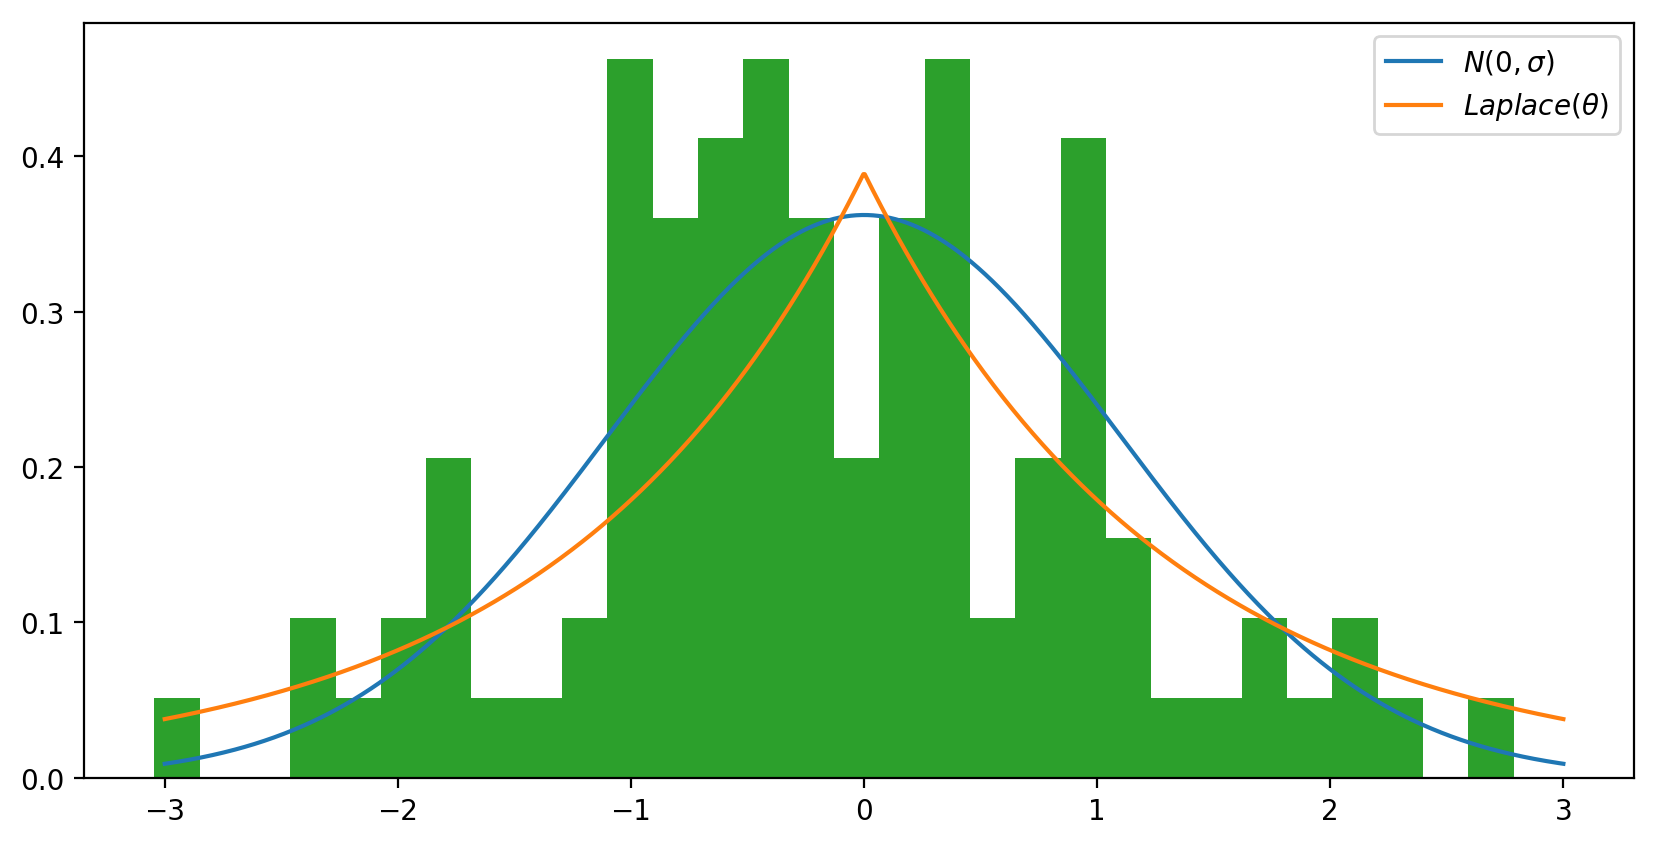

In [6]:

x = np.linspace(-3, 3, 1000)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(x, sts.norm(0, np.sqrt(s)).pdf(x), label=r'$N(0, \sigma)$')
plt.plot(x, sts.laplace(scale=np.sqrt(2/s)).pdf(x), label=r'$Laplace(\theta)$')
plt.hist(sample, bins=30, density=True)
plt.legend()
plt.show()

#### 2. На основе байесовского критерия построим критерии различия $H_0$ и $H_1$ уровня значимости 0.05 с помощью моделирования и определим, к какому распределению принадлежит выданная выборка.

Выберем априорным распределением $\sigma$ и $\theta$ стандартное экспоненциальное $(q(x) = e^{-x}I(x>0))$, и предположим, что $\sigma$ и $\theta$ независимы. Статистика $K$ будет в этом случае иметь вид: 

$$
K = \frac{\int_0^{\infty} \frac1{(\sqrt{2\pi\sigma^2})^n} e^{-\sum X_i^2/2\sigma^2} e^{-\sigma} d\sigma}{\int_0^{\infty} \left(\frac\theta2\right)^n e^{-\theta\sum|X_i|}e^{-\theta}d\theta}.
$$
Интегралы будем считать численно.

In [7]:
from scipy.integrate import quad

In [8]:
def f(x, T):
    return 1/(x**n * (2 * np.pi) ** (n/2))  * np.exp(-T/(2*x**2)) * np.exp(-x)
    
def g(x, T):
    return (x/2)**n * np.exp(-(T + 1) * x)

Посчитаем статистику для нашей выборки.

In [9]:
t1 = np.sum(sample ** 2)
t2 = np.sum(np.abs(sample))
k = quad(f, 0, np.inf, args=t1)[0] / quad(g, 0, np.inf, args=t2)[0]
k

140.27605553842594

Теперь смоделируем распределение статистики K при условии верности $H_0$, генерируя $N = 10000$ выборок.

In [10]:
N = 10000
ks = []
for i in range(N):
    theta = sts.expon.rvs(1)
    X = sts.norm(0, np.sqrt(theta)).rvs(n)
    t1 = np.sum(X ** 2)
    t2 = np.sum(np.abs(X))
    ks.append(quad(f, 0, np.inf, args=t1)[0] / quad(g, 0, np.inf, args=t2)[0])
ks = np.array(ks)

Построим нормированную гистограмму распределения и отметим на ней выборочный квантиль уровня 0.05 $(q_{0.05})$. 

q0.05 = 1.1756209169054876


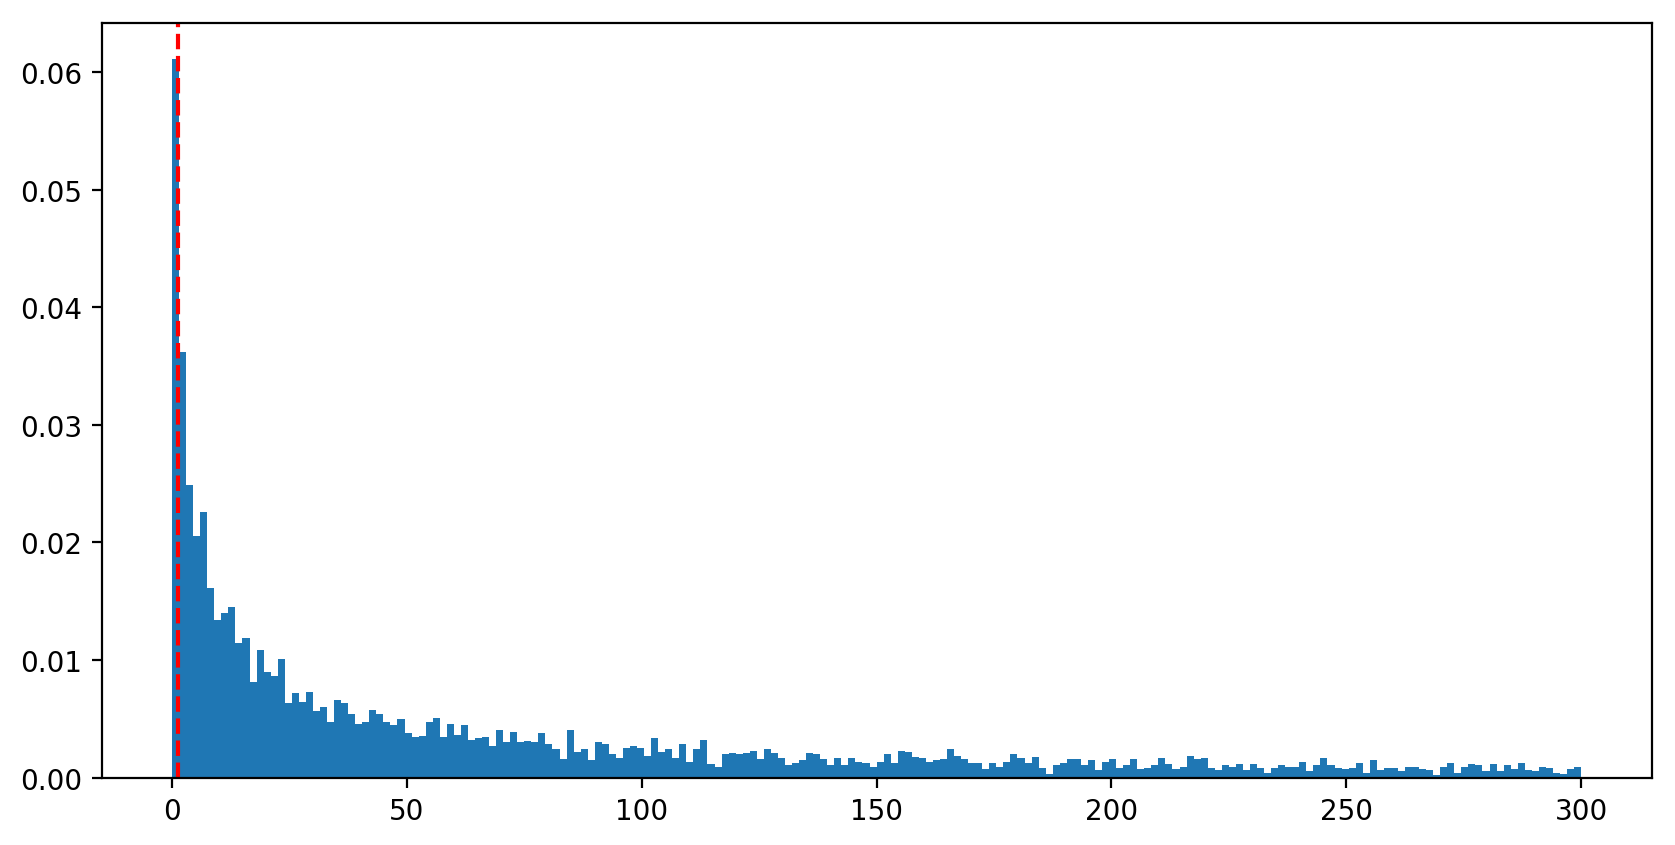

In [11]:
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(ks, bins=200, range=(0, 300), density=True)
x05 = np.percentile(ks, 5)
print('q0.05 =', x05)
plt.axvline(x=np.percentile(ks, 5), c='red', linestyle='--')
plt.show()

Неформально говоря, чем больше значение статистики K, тем больше вероятность того, что выборка имеет нормальное распределение, то есть верна $H_0$. Мы смоделировали распределение статистики K, ее выборочный квантиль является состоятельной оценкой истинного. Поэтому критерием проверки $H_0$ уровня значимости 0.05 в данном случае будет $S = \{K(X) \le q_{0.05} \approx 1.18\}$. 

#### 3. Вывод.

Для выданной выборки занчение статистики K примерно равно 140. Это значит, что, согласно построенному критерию, выборка принадлежит нормальному распределению. Такое же предположение можно сделать, посмотрев на гистограмму выборки (значения больше сконцентрированы в окрестности нуля, чем в случае распределения Лапласа). Кроме того, полученный критерий соотносится с эмпирическим правилом, упомянутым на лекции (принять $H_0$, если $K \ge 3$), и даже усиливает его.